<h1>Thera Bank Personal Loan Campaign</h1>
<hr/>
<hr/>


<b>Data Description:</b>
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

<hr/>

##<b>Domain:</b>
<blockquote>Banking</blockquote>
<hr/>

##<b>Context:</b>
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.



<hr/>
##<b>Attribute Information:</b>


<blockquote>
    <ul>
        <li>ID: Customer ID</li>
        <li>Age: Customer's age in completed years</li>
        <li>Experience: #years of professional experience</li>
        <li>Income: Annual income of the customer `($000)`</li>
        <li>ZIP Code: Home Address ZIP code.</li>
        <li>Family: Family size of the customer</li>
        <li>CCAvg: Avg. spending on credit cards per month `($000)`</li>
        <li>Education: Education Level. 1: Undergrad; 2: Graduate; 3:  Advanced/Professional</li>
        <li>Mortgage: Value of house mortgage if any. `($000)`</li>
        <li>Personal Loan: Did this customer accept the personal loan offered in the last campaign?</li>
        <li>Securities Account: Does the customer have a securities account with the bank?</li>
        <li>CD Account: Does the customer have a certificate of deposit (CD) account with the bank?</li>
        <li>Online: Does the customer use internet banking facilities?</li>
        <li>Credit card: Does the customer use a credit card issued by the bank?</li>
    </ul>
</blockquote>


<b>Objective:</b>
The classification goal is to predict the likelihood of a liability customer buying personal loans.


In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [13]:
data_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [15]:
print('Shape:',data_df.shape)
print('any null value?:',data_df.isna().sum().any())

Shape: (5000, 14)
any null value?: False


In [16]:
# ID column doesn't help in prediction. so let's drop it
data_df.drop(['ID'], axis=1, inplace=True)

In [19]:
#Convert the Categorical variable type to category from int data type
data_df['Personal Loan'] = data_df['Personal Loan'].astype('category')
data_df['Securities Account'] = data_df['Securities Account'].astype('category')
data_df['CD Account'] = data_df['CD Account'].astype('category')
data_df['Online'] = data_df['Online'].astype('category')
data_df['CreditCard'] = data_df['CreditCard'].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(7)
memory usage: 337.5 KB


In [7]:
data_df.corr() # Correlation matrix

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000


In [8]:
data_df.describe().transpose() #Description about the dataset

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


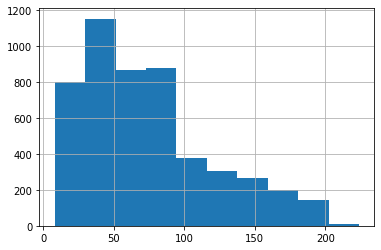

In [30]:
# Income distribution
data_df['Income'].hist()

Text(0, 0.5, 'Personal Loan accepted/declined')

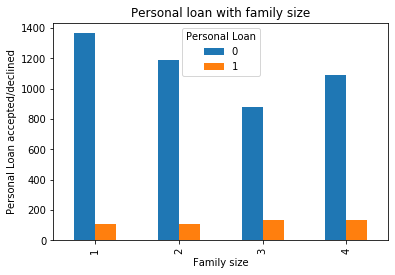

In [121]:
# The personal loan distribution is not based on family size as per below chart
pd.crosstab(data_df.Family,data_df['Personal Loan']).plot(kind='bar')
plt.title('Personal loan with family size')
plt.xlabel('Family size')
plt.ylabel('Personal Loan accepted/declined')

Plot the supporting variables against target variable

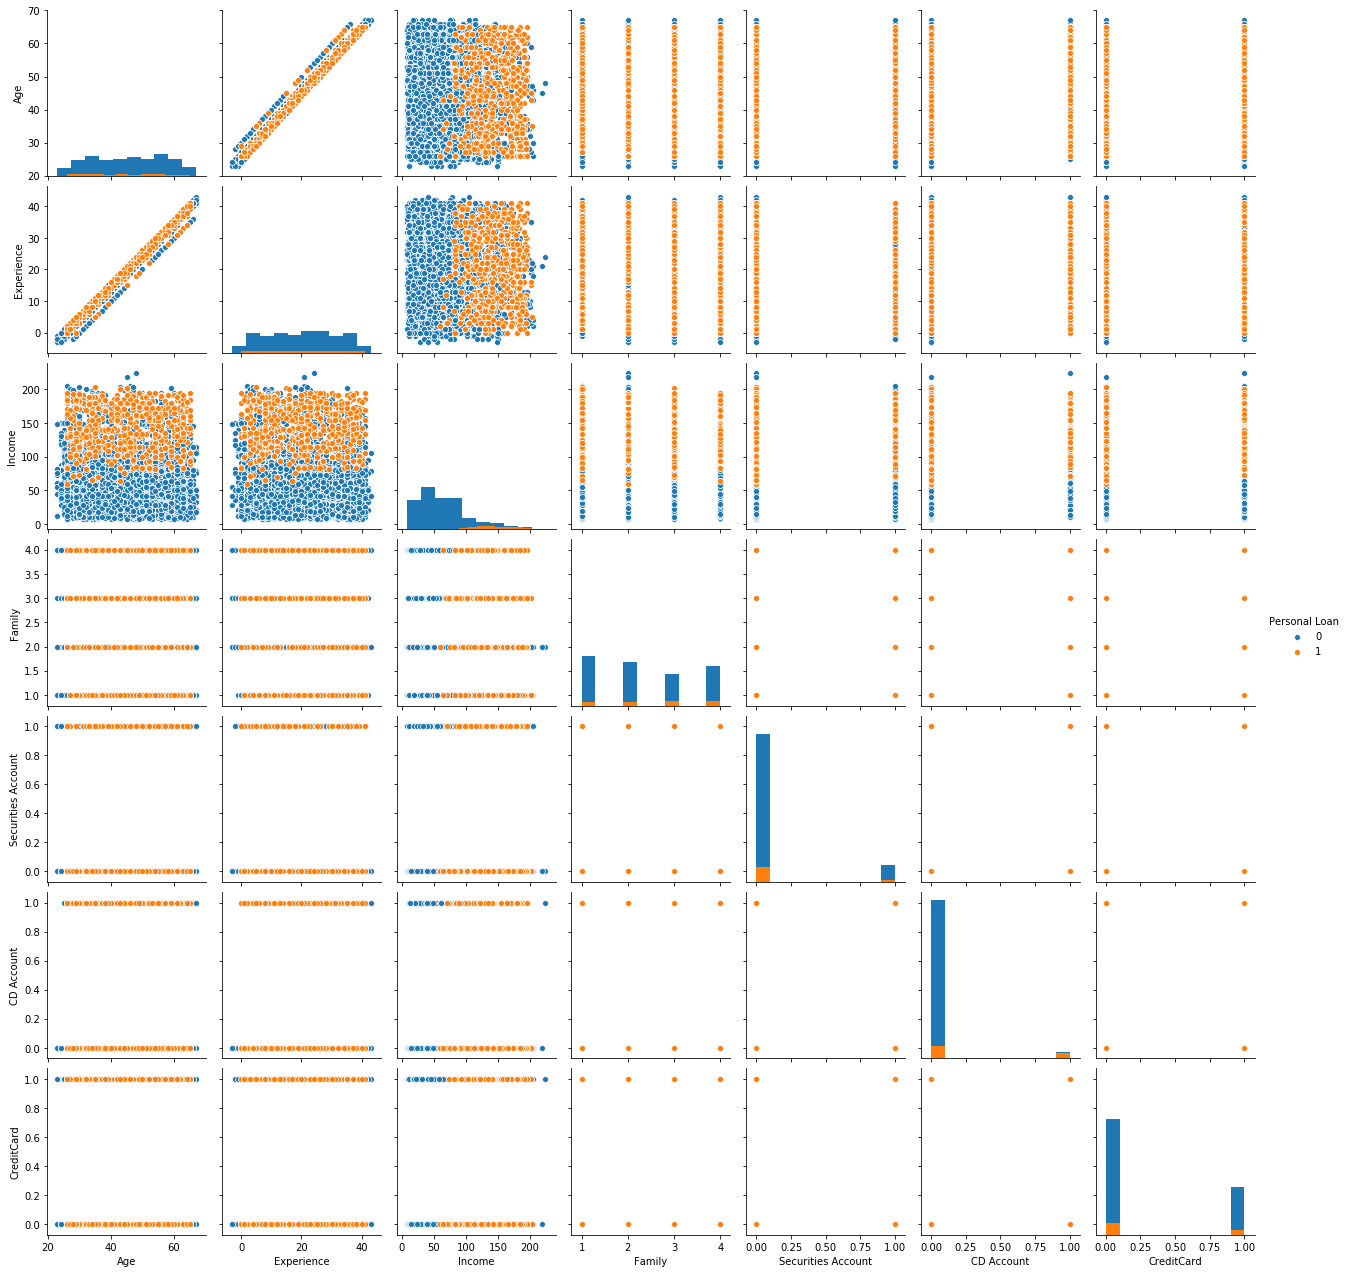

In [32]:
# Plot the supporting variables against target variable
spec_col_df = data_df.iloc[:, [0,1,2,4,8, 9,10,12]] # Only columns ['Age','Experience','Family', 'Income', 'CA Account', 'CreditCard' and 'Personal Loan']
sns.pairplot(spec_col_df,diag_kind='hist', hue="Personal Loan")

Binning the income into 5 groups and visualize the customers with the Personal loan status

In [33]:
data_df['income_group'] = pd.cut(data_df['Income'], bins=[0, 50, 100, 150, 200, 250],
                         labels=[1, 2, 3, 4, 5]) # Grouping the income
data_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,income_group
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,2
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1


Data distribution with income group and personal loan: AxesSubplot(0.125,0.125;0.775x0.755)


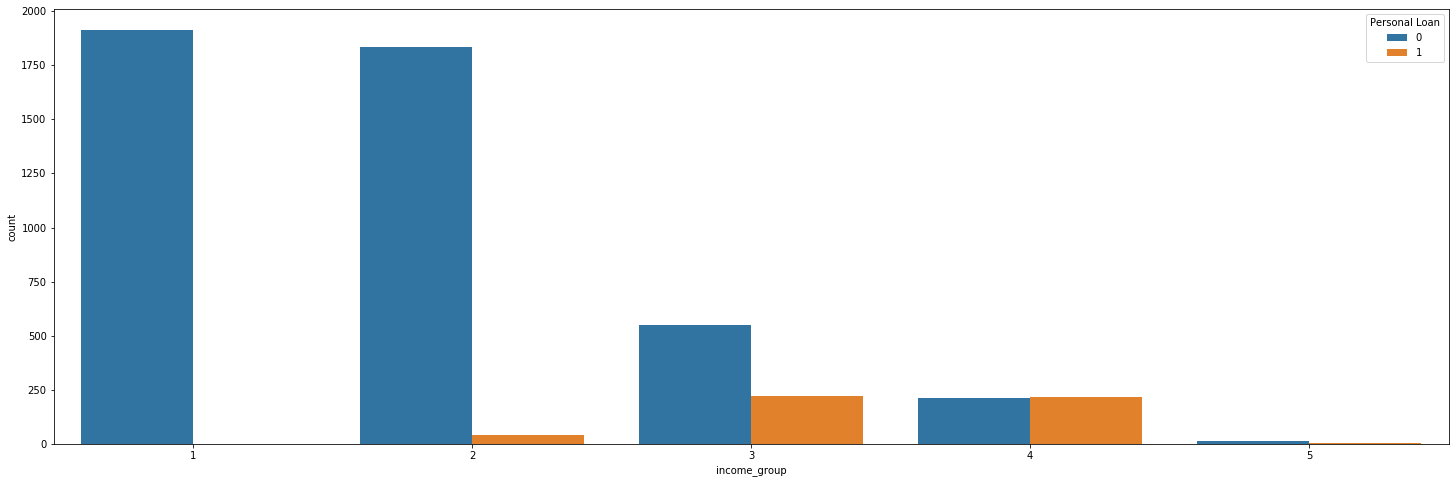

In [15]:
plt.figure(figsize=(25,8))

print('Data distribution with income group and personal loan:',sns.countplot(data_df['income_group'], hue=data_df['Personal Loan'], linewidth=2))

Based on above result, people are from 100-150 and 150-200 salary group availing Personal Loans

Text(0, 0.5, 'Personal Load accepted/declined')

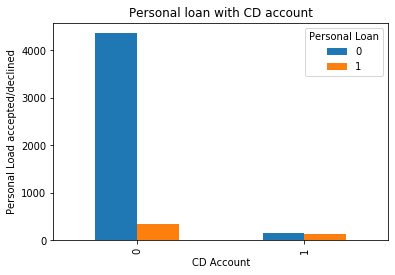

In [17]:
pd.crosstab(data_df['CD Account'],data_df['Personal Loan']).plot(kind='bar')
plt.title('Personal loan with CD account')
plt.xlabel('CD Account')
plt.ylabel('Personal Load accepted/declined')
# customer who has CD account has Personal Loan

Based on above result, the customer who has CD account is availing Personal Loan

In [37]:
# Find the target column which is 'Personal Loan' to understand how the data is distributed among the various values
data_df.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
Personal Loan,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833


## Target Column distribution
The Personal Loan column is the target column. Other columns are supporting columns

In [38]:
n_true = len(data_df[data_df['Personal Loan']==1])
n_false = len(data_df[data_df['Personal Loan']==0])

print("Number of people accepted the personal loan: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of people declined the personal loan: {0} ({1:2.2f}%)".format(n_true, (n_false / (n_true + n_false)) * 100 ))


Number of people accepted the personal loan: 480 (9.60%)
Number of people declined the personal loan: 480 (90.40%)


In [114]:
X = data_df.drop(['Personal Loan','income_group','ZIP Code'],axis=1) #Drop target column and columns used only for visualization
y = data_df['Personal Loan']   # Personal Loan (1=Accepted/Availed, 0=Declined/Not availed) (1 X m)

## Spliting the data 
Spliting the data - 70% of data for training and 30% for testing.

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X = pd.get_dummies(X_train, drop_first=True) # 

X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.30,1,0,0,0,1,0
4768,38,14,39,1,2.00,2,0,0,0,1,0
65,59,35,131,1,3.80,1,0,0,0,1,1
177,29,3,65,4,1.80,2,244,0,0,0,0
4489,39,13,21,3,0.20,2,0,0,0,1,0


<h1>Model building using Logistic Regression</h1>

In [116]:
X_train = pd.get_dummies(X_train, drop_first=True)
logit = sm.Logit(y_train, sm.add_constant(X_train))
model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.124378
         Iterations 9


In [117]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.6026
Time:                        10:34:23   Log-Likelihood:                -435.32
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.895e-276
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -12.3954      1.980     -6.261      0.000     -16.276      -8.515
Age                     -0.0503      0.073     -0.684      0.494      -0.194       0.094
Experience  

## Finding R2 and Odds ratio

In [118]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
modelcoef = pd.DataFrame(model.params, columns=['coef'])
modelcoef.loc[:, "Odds_ratio"] = np.exp(modelcoef.coef)
modelcoef['probability'] = modelcoef['Odds_ratio']/(1+modelcoef['Odds_ratio'])
modelcoef['pval']=model.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [119]:
# Filter by significant p-value (pval <0.1) and sort descending by Odds ratio
modelcoef = modelcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = modelcoef['pval']<=0.1
modelcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account_1,3.88,48.25,0.98,0.00
Education,1.74,5.69,0.85,0.00
Family,0.73,2.08,0.67,0.00
CCAvg,0.17,1.19,0.54,0.00
Income,0.05,1.06,0.51,0.00
Online_1,-0.64,0.53,0.35,0.00
CreditCard_1,-1.18,0.31,0.23,0.00
Securities Account_1,-1.20,0.30,0.23,0.00
const,-12.40,0.00,0.00,0.00


Based on above result, the prediction will be 
* Customer who has <b>certificate of deposit (CD) account has more (98%) probabilities  </b> to take Personal Loan
* Customer who has high education has more probabilities


## Prediction

In [120]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


      0    1    2    3    4    5     6    7     8     9  intercept
0 -0.02 0.04 0.46 0.13 1.19 0.00 -0.91 3.15 -0.61 -1.03      -9.17


In [110]:
from statsmodels.api import add_constant
X2 = add_constant(X_train)
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.pvalues
lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:               OLS               Adj. R-squared:      0.389    
Dependent Variable:  Personal Loan     AIC:                 -383.2422
Date:                2020-02-22 10:33  BIC:                 -315.4765
No. Observations:    3500              Log-Likelihood:      202.62   
Df Model:            10                F-statistic:         224.0    
Df Residuals:        3489              Prob (F-statistic):  0.00     
R-squared:           0.391             Scale:               0.052313 
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                -0.3595   0.0230 -15.6266 0.0000 -0.4046 -0.3144
Age                   0.0002   0.0003   0.5387 0.5901 -0.0005  0.0008
Income                0.0028   0.0001  24.5453 0.0000  0.0026  0.0030
Family                0.0330   0.0034   9.6239 0.0000  0.0263  0.0397
CCAvg                 0.0168   0.0029   5.7073 0.0000  0.0110  0.0225
Education             0.0729   0.0047  15.4775 0.0000  0.0637  0.0822
Mortgage              0.0001   0.0000   2.2429 0.0250  0.0000  0.0002
Securities Account_1 -0.0716   0.0135  -5.2985 0.0000 -0.0981 -0.0451
CD Account_1          0.3313   0.0186  17.8275 0.0000  0.2948  0.3677
Online_1             -0.0251   0.0080  -3.1286 0.0018 -0.0408 -0.0094
CreditCard_1         -0.0455   0.0089  -5.1085 0.0000 -0.0630 -0.0280
---------------------------------------------------------------------
Omnibus:               919.326       Durbin-Watson:          2.014   
Prob(Omnibus):         0.000         Jarque-Bera (JB):       2440.200
Skew:                  1.399         Prob(JB):               0.000   
Kurtosis:              5.985         Condition No.:          818     
=====================================================================

"""

<h3>Confusion Matrix</h3>

In [111]:
#Predict for train set
pred_train = model.predict(X_train)
mat_train = confusion_matrix(y_train,pred_train)
print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[3127   42]
 [ 138  193]]


In [112]:
#Predict for test set
pred_test = model.predict(X_test)
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1337   14]
 [  73   76]]


The result says, 1318+43 correct prediction and 33+106 are wrong predictions.

<h3>Model Scores</h3>

In [122]:
# Model accuracy with train data
model_score = model.score(X_train, y_train)
print(model_score)

0.952


In [123]:
# Model accuracy with test data
model_score = model.score(X_test, y_test)
print(model_score)

0.9453333333333334


<h3>Compare Precision, Recall and F-Measure</h3>

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.57      0.67       149

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



<h3> ROC Curve </h3>

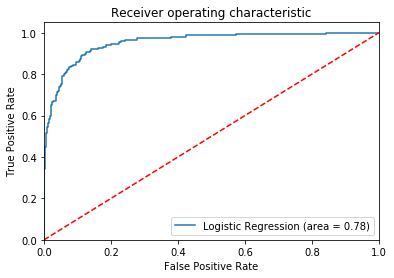

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [101]:
auc_score = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.95

<b>The model prediction score and ROC curve confirms that model is performing well. </b>